In [1]:
from brwy4build.run.main import initialize
from brwy4build.Objects.objects import *
from brwy4build.Analysis import analyze
from brwy4build.utils.processing import *

/home/haithamth/Desktop/code/DNSA_LCA_project/brwy4build
resetting all objects


In [2]:
initialize(projectname="DSPS case studyv14", data_file_path="/home/haithamth/Documents/xlsx/paper1-sen1.xlsx", path_to_save_folder="/home/haithamth/Documents/My_saved_analysis"
           ,project_new=True, lca_new=False, mc_pick=80, MCiterations=1500, material_flow_mcs=80, mode="user input")

lca loaded!
objects generated
buildings connected to assemblies!
relations connected with products!
updated total amount of products
product rpc calculated!
assemblies rpc calculated!
buildings rpc calculated!
project saved!
a1a3 and a4 added!
B4 added!
C2 added!
C3 added!
C4 added!
D1 added!
D2 added!
D3 added!
Exported results to product objects
Exported results to assembly objects
Exported results to assembly objects
Exported results to building objects
project saved!


In [3]:
b4 = Building.instances[0].impactsMC_b4_array/120/60
total_plus_d = Building.instances[0].total_impactMC_with_d_rpc_array/120/60

In [6]:
my_arrays = load_all_arrays("/home/haithamth/Documents/Asse_sen2/")

In [9]:
# get only arrays that have b4 in the name from my_arrays
b4_arrays = load_all_arrays("/home/haithamth/Documents/Asse_sen3 b4")
# get only arrays that have ISD in the name from my_arrays
isd_arrays = load_all_arrays("/home/haithamth/Documents/Asse_sen2 only isd")

In [21]:
b4_arrays

{'Services_B4_HD': array([[[ 3.28751947e-02,  3.31287577e-02,  3.21532504e-02, ...,
           3.21702250e-02,  3.61226880e-02,  3.42865061e-02],
         [ 3.42016690e+00,  3.41266136e+00,  3.52257261e+00, ...,
           3.47153258e+00,  4.02893394e+00,  3.85759758e+00],
         [-1.70491185e-01, -2.57345856e-01, -2.85182028e-01, ...,
          -2.02617219e-01, -1.64040805e-02,  1.04316032e-01],
         ...,
         [ 4.96429163e+01,  5.21737627e+01,  5.12791604e+01, ...,
           4.65324319e+01,  5.07766025e+01,  5.10355654e+01],
         [ 1.67679045e-04,  1.68786233e-04,  1.91021555e-04, ...,
           1.60175476e-04,  2.31890413e-04,  2.22595059e-04],
         [ 1.58976484e+00,  1.64736517e+00,  1.57407597e+00, ...,
           1.57042726e+00,  1.71653557e+00,  1.58973263e+00]],
 
        [[ 3.28293539e-02,  3.30937366e-02,  3.21082939e-02, ...,
           3.21329386e-02,  3.60979707e-02,  3.42365185e-02],
         [ 3.41483730e+00,  3.40756711e+00,  3.51612653e+00, ...,
   

In [15]:
normalized_arrays_b4 = [array / b4 for array in b4_arrays]

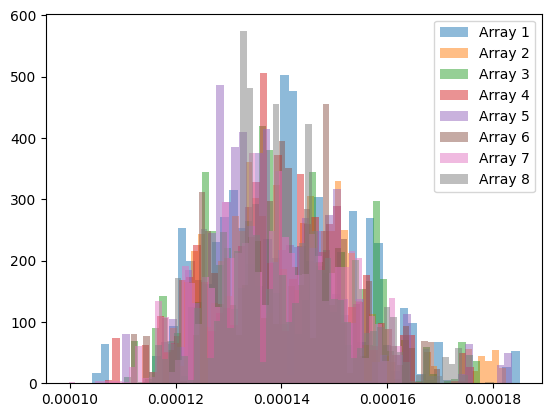

In [18]:
import matplotlib.pyplot as plt

# Assume we have some normalized arrays
normalized_arrays = normalized_arrays_b4

# Create a new figure
plt.figure()

# Plot each normalized array for the specific impact category
for i, array in enumerate(normalized_arrays):
    # Select specific data and flatten it
    data = array[:, 1, :].flatten()
    plt.hist(data, bins=50, alpha=0.5, label=f'Array {i+1}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


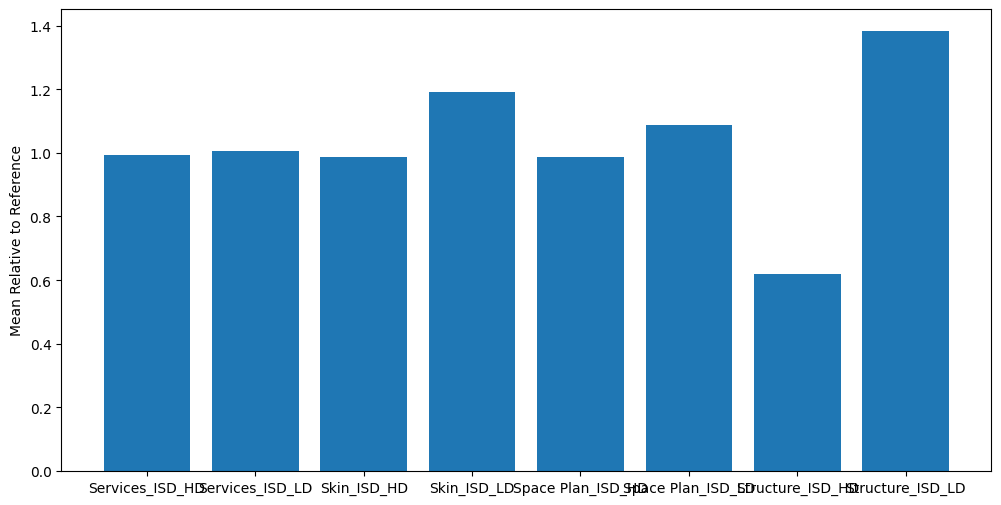

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assume we have some scenario arrays
scenario_arrays = isd_arrays

# Reference array for normalization
reference_array = total_plus_d # Replace with your actual reference array

# Select the specific impact category
impact_category_index = 1

# Calculate means for each scenario array and the reference array, then calculate ratios
means = [np.mean(array[:, impact_category_index, :]) for array in scenario_arrays.values()]
reference_mean = np.mean(reference_array[:, impact_category_index, :])

ratios = [mean / reference_mean for mean in means]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(scenario_arrays.keys(), ratios)
plt.ylabel('Mean Relative to Reference')
plt.show()


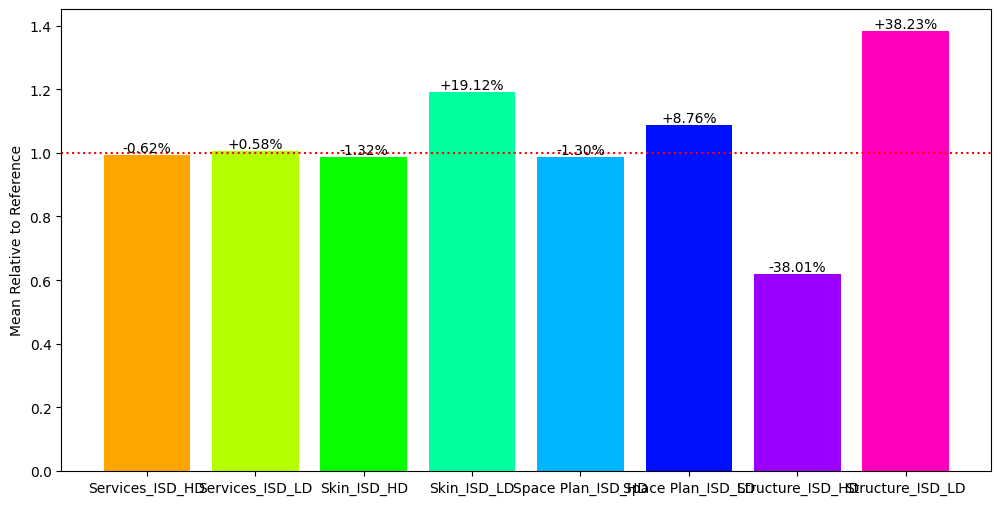

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a color palette
colors = sns.color_palette('hsv', len(isd_arrays))

# Assume we have some scenario arrays
scenario_arrays = isd_arrays

# Reference array for normalization
reference_array = total_plus_d  # Replace with your actual reference array

# Select the specific impact category
impact_category_index = 1

# Calculate means for each scenario array and the reference array, then calculate ratios
means = [np.mean(array[:, impact_category_index, :]) for array in scenario_arrays.values()]
reference_mean = np.mean(reference_array[:, impact_category_index, :])

ratios = [mean / reference_mean for mean in means]

# Plot
plt.figure(figsize=(12, 6))

bars = plt.bar(scenario_arrays.keys(), ratios, color=colors)
plt.axhline(y=1, color='r', linestyle='dotted') # Add dotted line at y=1, which represents the reference value

# Add text labels for the percentage change
for bar, ratio in zip(bars, ratios):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{(ratio-1)*100:+.2f}%', ha='center', va='bottom')

plt.ylabel('Mean Relative to Reference')
plt.show()


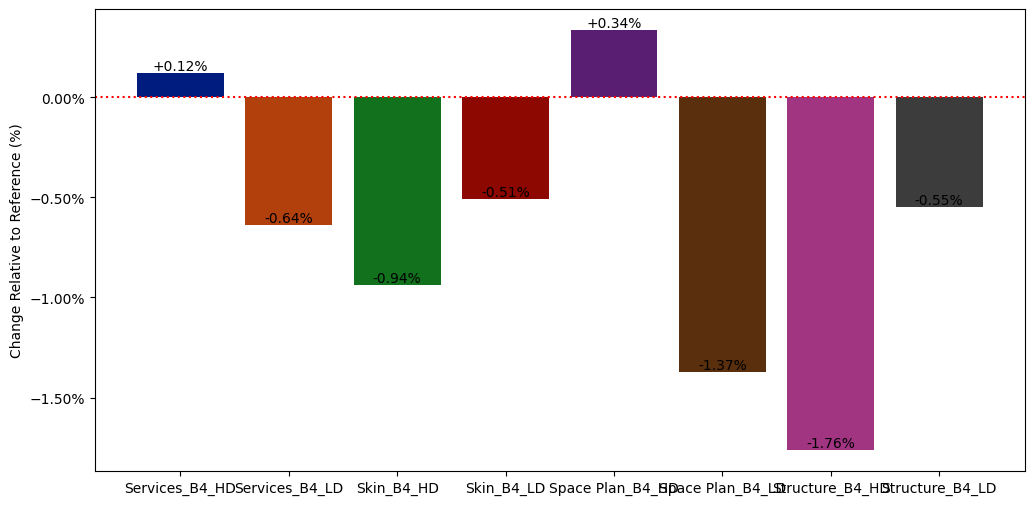

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Generate a color palette
colors = sns.color_palette('dark', len(b4_arrays))

# Assume we have some scenario arrays
scenario_arrays = b4_arrays

# Reference array for normalization
reference_array = b4  # Replace with your actual reference array

# Select the specific impact category
impact_category_index = 1

# Calculate means for each scenario array and the reference array, then calculate ratios
means = [np.mean(array[:, impact_category_index, :]) for array in scenario_arrays.values()]
reference_mean = np.mean(reference_array[:, impact_category_index, :])

ratios = [(mean / reference_mean - 1) * 100 for mean in means] # Adjust to be percentage-based

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(scenario_arrays.keys(), ratios, color=colors)

# Format the y-axis to display as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

plt.axhline(y=0, color='r', linestyle='dotted') # Add dotted line at y=0, which represents the reference value (no change)

# Add text labels for the percentage change
for bar, ratio in zip(bars, ratios):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{ratio:+.2f}%', ha='center', va='bottom')

plt.ylabel('Change Relative to Reference (%)')
plt.show()


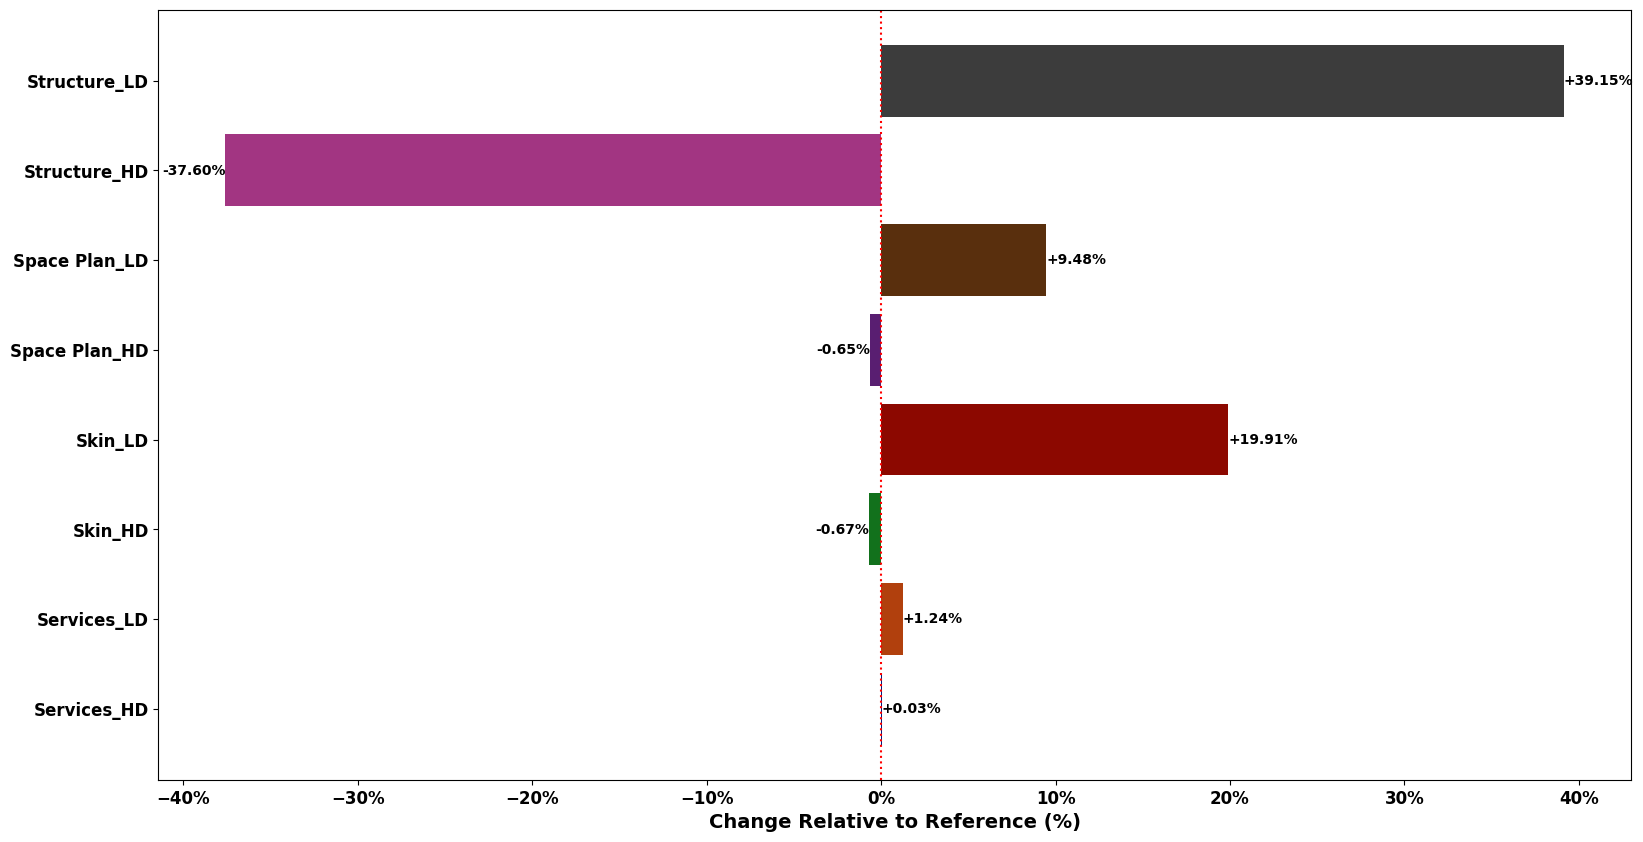

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Generate a color palette
colors = sns.color_palette('dark', len(isd_arrays))

# Assume we have some scenario arrays
scenario_arrays = isd_arrays

# Reference array for normalization
reference_array = total_plus_d  # Replace with your actual reference array

# Select the specific impact category
impact_category_index = 1

# Calculate means for each scenario array and the reference array, then calculate ratios
means = [np.mean(array[:, impact_category_index, :]) for array in scenario_arrays.values()]
reference_mean = np.mean(reference_array[:, impact_category_index, :])

ratios = [(mean / reference_mean - 1) * 100 for mean in means] # Adjust to be percentage-based

# Plot
plt.figure(figsize=(19, 10))
bars = plt.barh(list(scenario_arrays.keys()), ratios, color=colors)

# Format the x-axis to display as percentages
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter())

plt.axvline(x=0, color='r', linestyle='dotted') # Add dotted line at x=0, which represents the reference value (no change)

# Add text labels for the percentage change
for bar, ratio in zip(bars, ratios):
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{ratio:+.2f}%', ha='right' if ratio < 0 else 'left', va='center', fontdict={'fontsize': 10})

plt.xlabel('Change Relative to Reference (%)', fontdict={'fontsize': 14})
#save
# change font size only of y and x ticks
plt.tick_params(axis='both', which='major', labelsize=12)
# font bold
# change font size
plt.rcParams['font.weight'] = 'bold'
# font family calibri
plt.rcParams['font.family'] = 'Calibri'

plt.savefig('isd-hor3.png', dpi=1000)
plt.show()

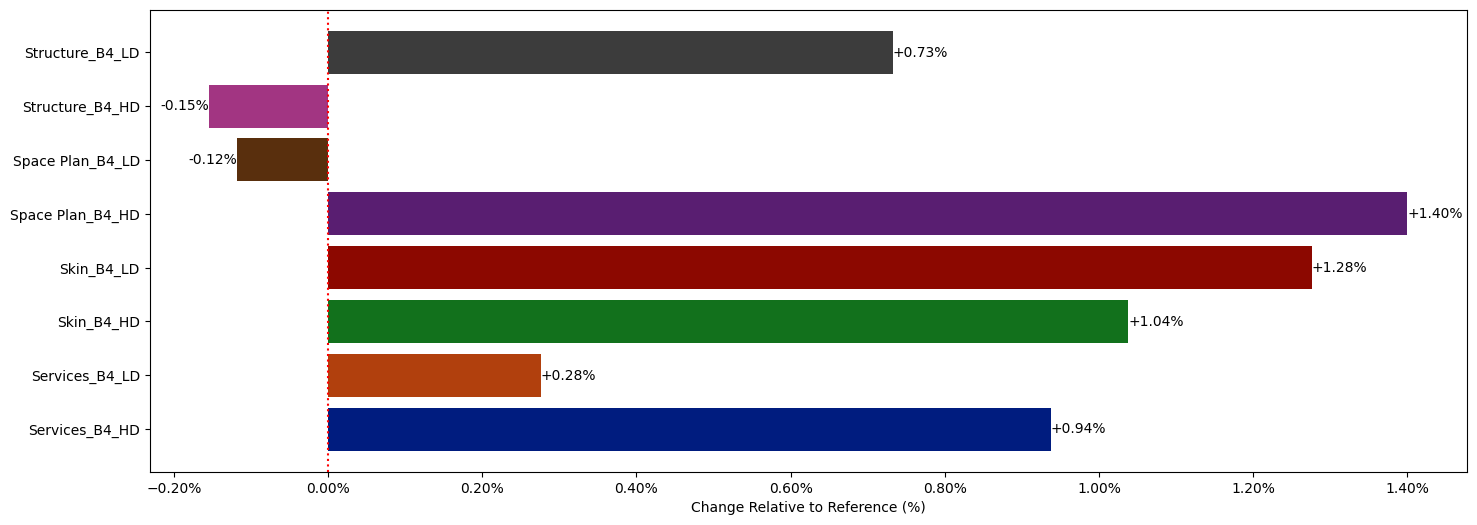

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Generate a color palette
colors = sns.color_palette('dark', len(b4_arrays))

# Assume we have some scenario arrays
scenario_arrays = b4_arrays

# Reference array for normalization
reference_array = b4  # Replace with your actual reference array

# Select the specific impact category
impact_category_index = 1

# Calculate means for each scenario array and the reference array, then calculate ratios
means = [np.median(array[:, impact_category_index, :]) for array in scenario_arrays.values()]
reference_mean = np.median(reference_array[:, impact_category_index, :])

ratios = [(mean / reference_mean - 1) * 100 for mean in means] # Adjust to be percentage-based

# Plot
plt.figure(figsize=(17, 6))
bars = plt.barh(list(scenario_arrays.keys()), ratios, color=colors)

# Format the x-axis to display as percentages
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter())

plt.axvline(x=0, color='r', linestyle='dotted') # Add dotted line at x=0, which represents the reference value (no change)

# Add text labels for the percentage change
for bar, ratio in zip(bars, ratios):
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{ratio:+.2f}%', ha='right' if ratio < 0 else 'left', va='center')

plt.xlabel('Change Relative to Reference (%)')
plt.show()

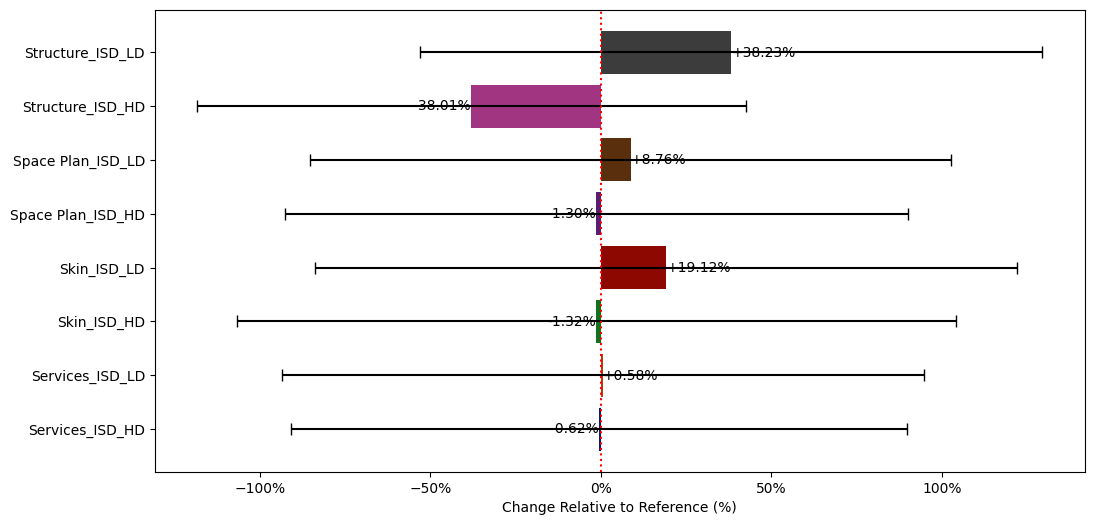

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Generate a color palette
colors = sns.color_palette('dark', len(isd_arrays))

# Assume we have some scenario arrays
scenario_arrays = isd_arrays

# Reference array for normalization
reference_array = total_plus_d  # Replace with your actual reference array

# Select the specific impact category
impact_category_index = 1

# Calculate means and standard deviations for each scenario array and the reference array, then calculate ratios
means = [np.mean(array[:, impact_category_index, :]) for array in scenario_arrays.values()]
std_devs = [np.std(array[:, impact_category_index, :]) for array in scenario_arrays.values()]

reference_mean = np.mean(reference_array[:, impact_category_index, :])
reference_std = np.std(reference_array[:, impact_category_index, :])

ratios = [(mean / reference_mean - 1) * 100 for mean in means]
ratio_errs = [(std_dev / reference_std) * 100 for std_dev in std_devs] # Standard deviation as a percentage

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(list(scenario_arrays.keys()), ratios, xerr=ratio_errs, color=colors, capsize=4)

# Format the x-axis to display as percentages
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter())

plt.axvline(x=0, color='r', linestyle='dotted') # Add dotted line at x=0, which represents the reference value (no change)

# Add text labels for the percentage change
for bar, ratio in zip(bars, ratios):
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{ratio:+.2f}%', ha='right' if ratio < 0 else 'left', va='center')

plt.xlabel('Change Relative to Reference (%)')
plt.show()
